In [1]:
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [2]:
from keras.datasets import fashion_mnist
(xtrain, ytrain) ,(xtest, ytest) = fashion_mnist.load_data()

In [3]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
xtrain = xtrain.reshape(-1, 28, 28, 1).astype('float32')/255.0
xtest = xtest.reshape(-1,28,28,1).astype('float32')/255.0

In [5]:
ytrain = keras.utils.to_categorical(ytrain)
ytest = keras.utils.to_categorical(ytest)

In [6]:
print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


In [7]:
model = Sequential()
model.add(Conv2D(32, activation='relu' , kernel_size=(3,3) , input_shape=(28,28,1)))
model.add(MaxPool2D( pool_size=(2,2)))
model.add(Conv2D(64, activation='relu', kernel_size=(3,3)))
model.add(MaxPool2D( pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy , optimizer= 'adam', metrics=['accuracy'])

In [9]:
model.fit(xtrain, ytrain , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4452
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2972
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2540
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2245
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1957


In [11]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.2852 - accuracy: 0.9002


[0.28520938754081726, 0.9002000093460083]

In [12]:
pred_val = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [13]:
pred_cat = np.argmax(pred_val , axis =1)

In [17]:
pred_cat[0:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 7,
       7, 5, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 7,
       4, 7, 2, 1, 2, 6, 4, 4, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1,
       3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=int64)

In [15]:
actual_cat = np.argmax(ytest, axis=1)

In [18]:
actual_cat[0:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=int64)

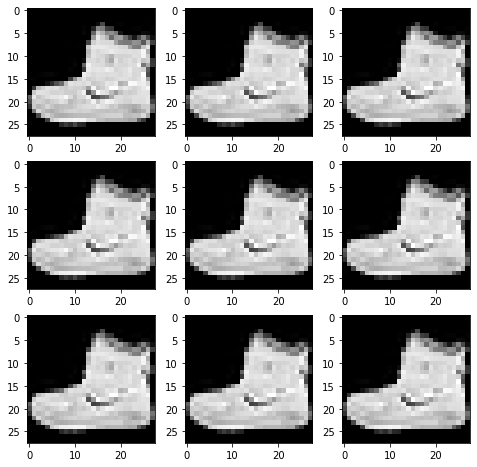

In [25]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(3,3,figsize=(8,8))

for i in range(3):
    for j in range(3):
        axis[i][j].imshow(xtrain[0], cmap="gray")